** Literatura (gorąco) polecana: "Elementy enzymologii" red. J. Witwicki i W. Ardelt, PWN, Warszawa 1984 **

#### Zamiast wstępu ...
Jak zależy szybkość początkowa reakcji (v0) od stężenia początkowego jednego z reagentów? Narysować wykres v0=f(A0).

$$ A + B \rightarrow P $$


Dla: $[B]_0$ = 0.01, k = 1e-5, $A0 = 0.001, 0.01, 0.05, 0.1, 0.5, 1$


0.001 9.99596150452e-09
0.01 9.99266292897e-08
0.05 4.98901732934e-07
0.1 9.95982261302e-07
0.5 4.9075410311e-06
1 9.63826874541e-06
2 1.85938213348e-05
5 4.18332719832e-05


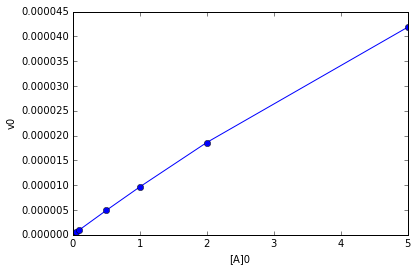

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import odeint


    
def model(y, t):
    
    a = y[0]
    b = y[1]
    p = y[2]
    
    k = 1e-3
    
    dadt = -k*a*b
    dbdt = -k*a*b
    dpdt = k*a*b
    
    return [dadt, dbdt, dpdt]


#przedział czasu
t_start = 0
t_end = 3600
t = np.linspace(t_start, t_end)

# listy zawierające wyniki
xx = []
yy = []

for a0 in [0.001,0.01,0.05,0.1,0.5,1,2,5]:
    res = odeint( model, [a0, 0.01, 0], t ) # [a0, b0, p0]
    a=res[:,0]
    b=res[:,1]
    p=res[:,2]
    v0=-(a[1]-a[0])/(t[1]-t[0])            # por. porzednie zajęcia
    print a0, v0
    xx.append(a0)
    yy.append(v0)
    
plt.xlabel("[A]0")
plt.ylabel("v0")
plt.plot(xx, yy, 'bo-')

Model kinetyczny reakcji enzymatycznej:

1)$$ S + E \longleftrightarrow ES , k1, k2 $$
2)$$ ES \longrightarrow P + E , k3 $$



<function matplotlib.pyplot.show>

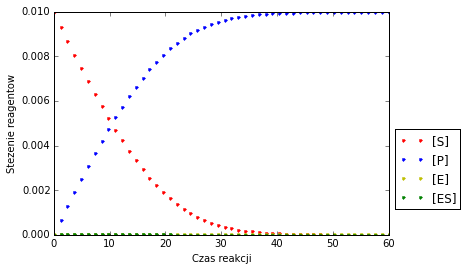

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import odeint


# r. enzymatyczna
# E + S <--> ES, k1 k2
# ES --> P + E, k3
    
k1 = 1e4
k2 = 25
k3 = 15
    
def model(y, t):
    
    s = y[0]
    e = y[1]
    es = y[2]
    p = y[3]
    
    dsdt = -k1*s*e + k2*es
    dedt = -k1*s*e + k2*es + k3*es
    desdt = k1*s*e - k2*es - k3*es
    dpdt = k3*es
    
    return [dsdt, dedt, desdt, dpdt]

#stężenie początkowe substratu i enzymu
s0 = 0.01
e0 = 0.00005

#przedział czasu
t_start = 0
t_end = 60


initial = [s0, e0, 0, 0]
t = np.linspace(t_start, t_end) # ts => time

res = odeint( model, [s0, e0, 0, 0], t )
s = res[:,0]
e = res[:,1]
es = res[:,2]
p = res[:,3]

plt.plot(t,s,'r.', label='[S]')
plt.plot(t,p,'b.', label='[P]')
plt.plot(t,e,'y.', label='[E]')
plt.plot(t,es,'g.', label='[ES]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas reakcji')
plt.ylabel('Stezenie reagentow')
plt.show

##### Pytania:

Jakie wartości podczas reakcji ma stężenie E i kompleksu aktywnego ES?

Dla jakiego przedziału czasu można stosować przybliżenie stanu quasi-stacjonarnego dla ES, czyli że $\frac{d[ES]}{dt}=0$?

Co się dzieje z enzymem na początku reakcji ($t \approx$ 0) i po wyczerpaniu się substratu ( w tym przykładzie dla $t$ > 40)? Jakie są stężenia enzymu (skala wykresu)?

** Zadanie 1. ** Przyjrzeć się modelowi reakcji enzymatycznej, zbadać zależność v0 = f(S0) (wykres).

In [3]:
# tutaj rozwiązanie ...

#### Równanie Michelisa-Menten / Briggisa i Haldene'a - analiza

$$v_0 = \frac{v_{max}[S]_0}{[S]_0+K_m}$$


$$v_{max} = k_3[E]_0$$

$$K_m = \frac{k_2 + k_3}{k_1}$$

In [4]:
# funkcja która oblicza szybkość początkową z modelu M-M

def MM(s0, vmax, Km):
    return (vmax*s0)/(s0+Km)

In [5]:
vmax = k3*e0
Km = (k2+k3)/k1
print("v_max = {0:.2e} Km = {1:.2e}".format(vmax, Km))

v_max = 7.50e-04 Km = 4.00e-03


In [6]:
s0_min = 0.001
s0_max = 0.1
s0 = np.linspace(s0_min, s0_max, 20)

In [7]:
print(s0)

[ 0.001       0.00621053  0.01142105  0.01663158  0.02184211  0.02705263
  0.03226316  0.03747368  0.04268421  0.04789474  0.05310526  0.05831579
  0.06352632  0.06873684  0.07394737  0.07915789  0.08436842  0.08957895
  0.09478947  0.1       ]


In [8]:
v0 = MM(s0, vmax, Km)

In [9]:
print(v0)

[ 0.00015     0.00045619  0.00055546  0.00060459  0.00063391  0.00065339
  0.00066727  0.00067766  0.00068574  0.00069219  0.00069747  0.00070186
  0.00070557  0.00070876  0.00071151  0.00071392  0.00071605  0.00071794
  0.00071963  0.00072115]


<function matplotlib.pyplot.show>

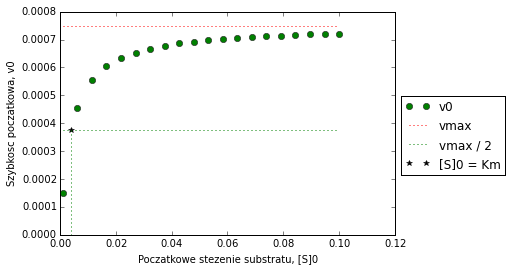

In [10]:
#
plt.plot(s0,v0,'go', label='v0')
plt.plot((s0_min, s0_max),(vmax, vmax),'r:', label='vmax')
plt.plot((s0_min, s0_max),(vmax/2, vmax/2),'g:', label='vmax / 2')
plt.plot(Km,vmax/2,'k*', label='[S]0 = Km')
plt.plot((Km, Km), (vmax/2, 0), 'g:')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.65))
plt.xlabel('Poczatkowe stezenie substratu, [S]0')
plt.ylabel('Szybkosc poczatkowa, v0')
plt.show


** Wariant 1 **

Dla $[S]_0 \ll K_m$


In [11]:
print(Km)

0.004


<function matplotlib.pyplot.show>

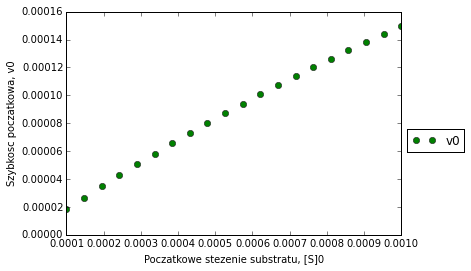

In [12]:
s0_min = 0.0001
s0_max = 0.001

s0 = np.linspace(s0_min, s0_max, 20)

v0 = MM(s0, vmax, Km)

plt.plot(s0,v0,'go', label='v0')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Poczatkowe stezenie substratu, [S]0')
plt.ylabel('Szybkosc poczatkowa, v0')
plt.show

Czyli dla dla $[S]_0 \ll K_m$, $v_0 \propto [S]_0 \Rightarrow$ zatem jest to reakcja rzędu pierwszego względem substratu S.

** Wariant 2. **

Dla $[S]_0 \gg K_m$

In [13]:
print(Km)

0.004


<function matplotlib.pyplot.show>

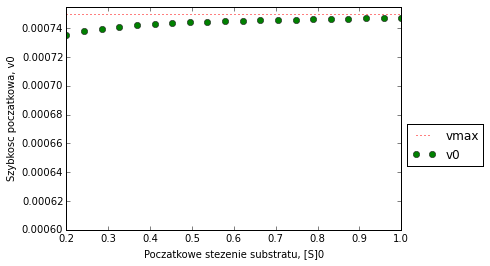

In [14]:
s0_min = 0.2
s0_max = 1

s0 = np.linspace(s0_min, s0_max, 20)

v0 = MM(s0, vmax, Km)

plt.ylim([0.0006,0.000755])
plt.plot((s0_min, s0_max),(vmax, vmax),'r:', label='vmax')

plt.plot(s0,v0,'go', label='v0')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Poczatkowe stezenie substratu, [S]0')
plt.ylabel('Szybkosc poczatkowa, v0')
plt.show

Czyli dla Dla $[S]_0 \gg K_m$, v0 nie zależy od [S]0, v0 $\approx$ const, zatem jest to kinetyka zerowego rzędu względem substratu.

** Zadanie 2. **

Opracować model kinetyczny reakcji enzymatycznej, uwzględniający dezaktywację termiczną enzymu (3):

1)$$ S + E \longleftrightarrow ES , k1, k2 $$
2)$$ ES \longrightarrow P + E , k3 $$
3)$$ E  \longrightarrow F , kd $$

Założyć:

k1 = 1e4
k2 = 25
k3 = 15


Porówanać przebieg procesu (P(t)) dla kd= 0, 1e-5, 1e-2 (wykres).

In [ ]:
# rozwiązanie ...

** Zadanie 3. **

Opracować model kinetyczny reakcji enzymatycznej, inhibitowanej substratem (patrz inwertaza):

1)$$ S + E \longleftrightarrow ES , k1, k2 $$
2)$$ ES \longrightarrow P + E , k3 $$
3)$$ ES + S  \longleftrightarrow ESS , k4, k5 $$

Która z form enzymu jest nieaktywną?

W obliczeniach założyć:

k1 = 1e4
k2 = 25
k3 = 15
k4 = ...
k5 = ...


Porówanać przebieg procesu P(t) - wykres przy różnym stopniu inhibicji.


In [15]:
# rozwiązanie ...